# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''


'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [14]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [15]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')        

## Have a look at the general data:

In [16]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/21/20  8/22/20  8/23/20  \
0        0        0        0        0  ...    37894    37953    37999   
1        0        0        0        0  ...     8119     8275     8427   
2        0        0        0        0  ...    40667    41068    41460   
3        0        0        0        0  ...     1045     1045     1045   
4        0        0        0        0  ...     2068     2134     2171   

   8/24/20  8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  
0    38054    38070    38113    38129    38140    38143    38162  
1     8605     8759     8927     9083     9195     9279     9380  
2    41858    42228    42619    43016    43403    43781    44146  
3     1060     1060     1098     1098     1124     1124     1124  
4     2222     2283     2332     2415     2471     2551     2624  

[5 rows x 226 columns]

In [17]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/21/20  8/22/20  8/23/20  \
0        0        0        0        0  ...     1385     1385     1387   
1        0        0        0        0  ...      240      245      250   
2        0        0        0        0  ...     1418     1424     1435   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...       94       94       96   

   8/24/20  8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  
0     1389     1397     1401     1401     1402     1402     1402  
1      254      259      263      266      271      275      280  
2     1446     1456     1465     1475     1483     1491     1501  
3       53       53       53       53       53       53       53  
4      100      102      103      105      106      107      107  

[5 rows x 226 columns]

In [18]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/21/20  8/22/20  8/23/20  \
0        0        0        0        0  ...    28016    28016    28180   
1        0        0        0        0  ...     4096     4184     4332   
2        0        0        0        0  ...    28587    28874    29142   
3        0        0        0        0  ...      875      875      875   
4        0        0        0        0  ...      804      814      818   

   8/24/20  8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  
0    28360    28440    29042    29046    29059    29063    29089  
1     4413     4530     4633     4791     4923     5020     5139  
2    29369    29587    29886    30157    30436    30717    30978  
3      877      877      893      893      902      902      902  
4      877      977      977     1335     1028     1041     1063  

[5 rows x 226 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [19]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#calculate the number of total[cases, deaths, recovered, active]
for col in confirmed.columns:
    total_cases.append(sum(confirmed[col]))
    total_deaths.append(sum(deaths[col]))
    total_recovered.append(sum(recoveries[col]))
    total_active.append(total_cases[-1] - total_deaths[-1] - total_recovered[-1])

#calculate the mortarity rate and recovery rate
for i in range(len(total_cases)):
    mortality_rate.append(total_deaths[i]/total_cases[i])
    recovery_rate.append(total_recovered[i]/total_cases[i])

In [20]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])
print("The lastest mortality rate of total cases: ", mortality_rate[-1])
print("The lastest recovery rate of total cases: ", recovery_rate[-1])

Total confirmed cases:  25222709
Total death cases:  846395
Total recoveries cases:  16618168
Total active cases:  7758146
The lastest mortality rate of total cases:  0.03355686338053537
The lastest recovery rate of total cases:  0.6588573812590868


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

<Figure size 432x288 with 0 Axes>

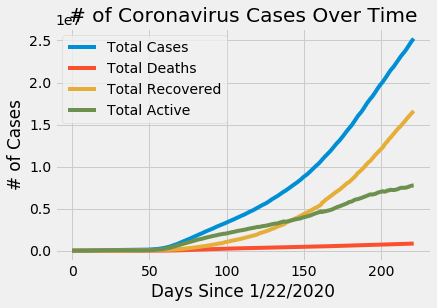

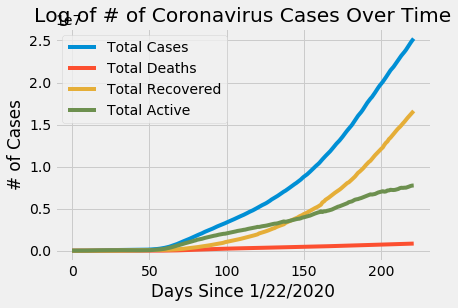

In [21]:
df = pd.DataFrame({'Total Cases': total_cases
                   ,'Total Deaths': total_deaths
                   ,'Total Recovered': total_recovered
                  ,'Total Active': total_active})

plt.figure(1)
df.plot(kind='line')
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')


plt.figure(2)
df.plot(kind='line')
plt.title('Log of # of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

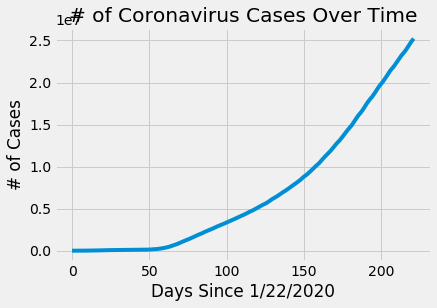

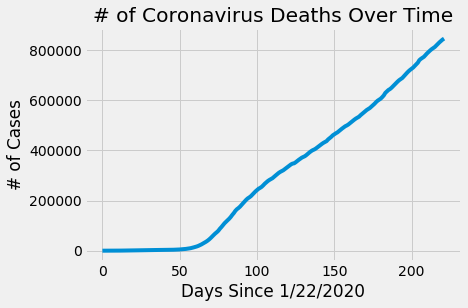

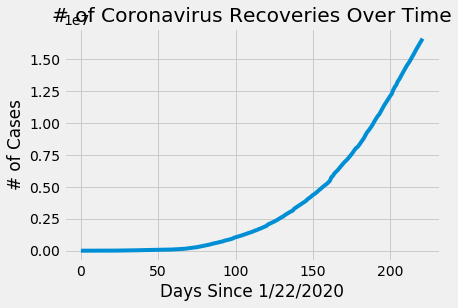

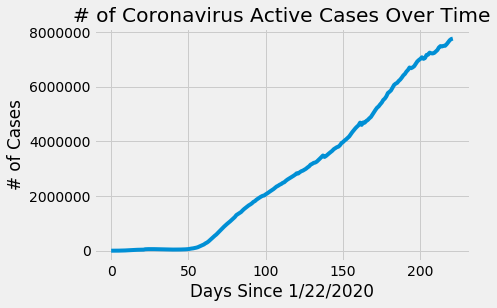

In [22]:
plt.figure(1)
plt.plot(adjusted_dates, total_cases)
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(2)
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(3)
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(4)
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.show()

## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [23]:
#Calculate the number of daily increase in total cases, total deaths, total recovered, and total active by time 
for i in range(len(total_cases)):
    if i == 0:
        daily_increases_total_cases[i] = 0
        daily_increases_total_deaths[i] = 0
        daily_increases_total_recovered[i] = 0
        daily_increases_total_active[i] = 0
    else:
        daily_increases_total_cases[i] = total_cases[i] - total_cases[i-1]
        daily_increases_total_deaths[i] = total_deaths[i] - total_deaths[i-1]
        daily_increases_total_recovered[i] = total_recovered[i] - total_recovered[i-1]
        daily_increases_total_active[i] = total_active[i] - total_active[i-1]

NameError: name 'daily_increases_total_cases' is not defined

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

In [24]:
plt.figure(1)
plt.bar(adjusted_dates, daily_increases_total_cases)
plt.title('World Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(2)
plt.bar(adjusted_dates, daily_increases_total_deaths)
plt.title('World Daily Increases in Confirmed Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

plt.figure(3)
plt.bar(adjusted_dates, daily_increases_total_recovered)
plt.title('World Daily Increases in Confirmed Recoveries')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')

NameError: name 'daily_increases_total_cases' is not defined

<Figure size 432x288 with 0 Axes>

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [25]:
#the global mortality and recovered rate in percentage by time.
mortality_rate_in_percentage = [i*100 for i in mortality_rate]
recovery_rate_in_percentage = [i*100 for i in recovery_rate]

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

<Figure size 432x288 with 0 Axes>

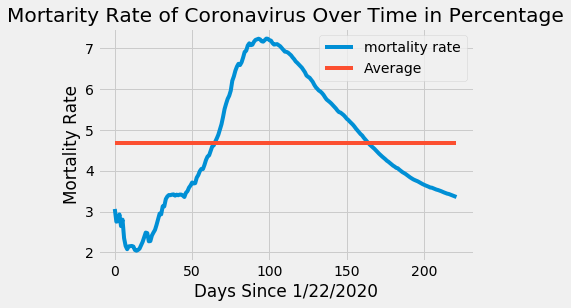

In [26]:
#get the average mortality rate of all the time
avg_mortality_rate = np.mean(mortality_rate_in_percentage)
#Transform the list into dataframe
mortality_rate_in_percentage_df = pd.DataFrame({'mortality rate':mortality_rate_in_percentage, 'Average':avg_mortality_rate})

#Visualize the mortality rate in by time (day units) using the line chart.
#
#Using the dashline to visualize the average mortality rate.
plt.figure()
mortality_rate_in_percentage_df.plot()
plt.title('Mortarity Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Mortality Rate')
plt.legend()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

<Figure size 432x288 with 0 Axes>

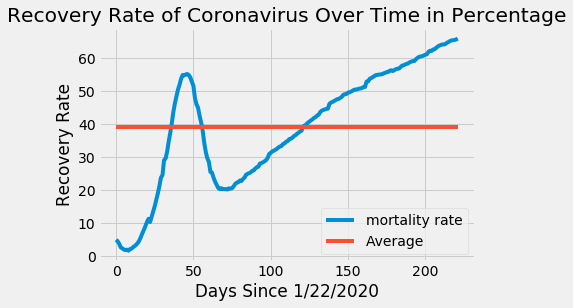

In [27]:
#get the average recovery rate of all the time
avg_recovery_rate = np.mean(recovery_rate_in_percentage)
#Transform the list into dataframe
recovery_rate_in_percentage_df = pd.DataFrame({'mortality rate': recovery_rate_in_percentage, 'Average':avg_recovery_rate})

#Visualize the mortality rate in by time (day units) using the line chart.
#
#Using the dashline to visualize the average mortality rate.
plt.figure()
recovery_rate_in_percentage_df.plot()
plt.title('Recovery Rate of Coronavirus Over Time in Percentage')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Recovery Rate')
plt.legend()

#  5. Continent Analysis

## Data Prerocessing

In [28]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [29]:
#getting continent code for country
confirmed_df_continent = []
deaths_df_continent = []
recoveries_df_continent = []

for i in range(len(confirmed_df)):
    confirmed_df_country = confirmed_df['Country/Region'][i]
    deaths_df_country = confirmed_df['Country/Region'][i]
    
    confirmed_df_continent_code = country_to_continent_code(confirmed_df_country)
    deaths_df_continent_code = country_to_continent_code(deaths_df_country)
    
    confirmed_df_continent.append(continents[confirmed_df_continent_code])
    deaths_df_continent.append(continents[deaths_df_continent_code])

for i in range(len(recoveries_df)):
    recoveries_df_country = recoveries_df['Country/Region'][i]
    recoveries_df_continent_code = country_to_continent_code(recoveries_df_country)
    recoveries_df_continent.append(continents[recoveries_df_continent_code])

    
#add the field "continent" into: 
confirmed_df['continent'] = confirmed_df_continent
deaths_df['continent'] = deaths_df_continent
recoveries_df['continent'] = recoveries_df_continent

In [30]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/22/20  8/23/20  8/24/20  \
0        0        0        0        0  ...    37953    37999    38054   
1        0        0        0        0  ...     8275     8427     8605   
2        0        0        0        0  ...    41068    41460    41858   
3        0        0        0        0  ...     1045     1045     1060   
4        0        0        0        0  ...     2134     2171     2222   

   8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  continent  
0    38070    38113    38129    38140    38143    38162       Asia  
1     8759     8927     9083     9195     9279     9380     Europe  
2    42228    42619    43016    43403    43781    44146     Africa  
3     1060     1098     1098     1124     1124     1124     Europe  
4     2283     2332     2415     2471     2551     2624     Africa  

[5 rows x 227 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Confirmed: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [36]:
Confirmed = confirmed_df.groupby('Country/Region').sum()
Confirm

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                                 
Afghanistan         33.939110  67.709953        0        0        0        0   
Albania             41.153300  20.168300        0        0        0        0   
Algeria             28.033900   1.659600        0        0        0        0   
Andorra             42.506300   1.521800        0        0        0        0   
Angola             -11.202700  17.873900        0        0        0        0   
...                       ...        ...      ...      ...      ...      ...   
West Bank and Gaza  31.952200  35.233200        0        0        0        0   
Western Sahara      24.215500 -12.885800        0        0        0        0   
Yemen               15.552727  48.516388        0        0        0        0   
Zambia             -13.133897  27.849332        0        0        0        0   
Zimbabwe           -19.015438  29.154857        0        0        0        0   

                    1/26/20  1/27/20  1/28/20  1/29/20  ...  8/21/20  8/22/20  \
Country/Region                                          ...                     
Afghanistan               0        0        0        0  ...    37894    37953   
Albania                   0        0        0        0  ...     8119     8275   
Algeria                   0        0        0        0  ...    40667    41068   
Andorra                   0        0        0        0  ...     1045     1045   
Angola                    0        0        0        0  ...     2068     2134   
...                     ...      ...      ...      ...  ...      ...      ...   
West Bank and Gaza        0        0        0        0  ...    18313    18476   
Western Sahara            0        0        0        0  ...       10       10   
Yemen                     0        0        0        0  ...     1906     1907   
Zambia                    0        0        0        0  ...    10627    10831   
Zimbabwe                  0        0        0        0  ...     5815     5893   

                    8/23/20  8/24/20  8/25/20  8/26/20  8/27/20  8/28/20  \
Country/Region                                                             
Afghanistan           37999    38054    38070    38113    38129    38140   
Albania                8427     8605     8759     8927     9083     9195   
Algeria               41460    41858    42228    42619    43016    43403   
Andorra                1045     1060     1060     1098     1098     1124   
Angola                 2171     2222     2283     2332     2415     2471   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza    18802    19213    19678    20155    20677    21251   
Western Sahara           10       10       10       10       10       10   
Yemen                  1911     1916     1924     1930     1933     1943   
Zambia                11082    11148    11285    11376    11601    11779   
Zimbabwe               5930     6070     6196     6251     6292     6388   

                    8/29/20  8/30/20  
Country/Region                        
Afghanistan           38143    38162  
Albania                9279     9380  
Algeria               43781    44146  
Andorra                1124     1124  
Angola                 2551     2624  
...                     ...      ...  
West Bank and Gaza    21668    22204  
Western Sahara           10       10  
Yemen                  1946     1953  
Zambia                11902    12025  
Zimbabwe               6406     6412  

[188 rows x 224 columns]

In [31]:
#columns for contries_df data frame
continent = []
Confirmed = []
Deaths = []
Recoveries = []
Active = []
Mortality_rate = []

countries = sorted(list(set(confirmed_df['Country/Region'])))
for country in countries:
    country_confirmed_cases = 0
    country_deaths_cases = 0
    
    for i in range(len(confirmed_df)):
        if confirmed_df['Country/Region'][i] == country:
            country_confirmed_cases += confirmed_df.loc[i, cols[-2]]
            country_deaths_cases += deaths_df.loc[i, cols[-2]]
        
    Confirmed.append(country_confirmed_cases)
    Deaths.append(country_deaths_cases)
    
for country in countries:
    country_recoveries_cases = 0
    
    for i in range(len(recoveries_df)):
        if recoveries_df['Country/Region'][i] == country:
            country_recoveries_cases += recoveries_df.loc[i, cols[-2]]
           
    Recoveries.append(country_recoveries_cases)


countries_df = pd.DataFrame()
countries_df['Country/Region'] = countries
countries_df['Lat'] = confirmed_df['Lat']
countries_df['Long'] = confirmed_df['Long']
countries_df['continent'] = confirmed_df['continent']
countries_df['Confirmed'] = Confirmed
countries_df['Deaths'] = Deaths
countries_df['Recoveries'] = Recoveries
countries_df['Active'] = countries_df['Confirmed'] - (countries_df['Deaths'] + countries_df['Recoveries'])
countries_df['Mortality Rate'] = (countries_df['Deaths'] / countries_df['Confirmed'])*100.00

countries_df = countries_df.set_index('Country/Region')
countries_df.head()

Lat       Long continent  Confirmed  Deaths  Recoveries  \
Country/Region                                                                 
Afghanistan     33.93911  67.709953      Asia      38143    1402       29063   
Albania         41.15330  20.168300    Europe       9279     275        5020   
Algeria         28.03390   1.659600    Africa      43781    1491       30717   
Andorra         42.50630   1.521800    Europe       1124      53         902   
Angola         -11.20270  17.873900    Africa       2551     107        1041   

                Active  Mortality Rate  
Country/Region                          
Afghanistan       7678        3.675642  
Albania           3984        2.963681  
Algeria          11573        3.405587  
Andorra            169        4.715302  
Angola            1403        4.194434

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [32]:
continent = sorted(set(list(confirmed_df['continent'])))
Confirmed = []
Deaths = []
Recoveries = []
Active = []
Mortality_rate = []

for continent_i in continent:
    continent_confirmed_cases = 0
    continent_deaths_cases = 0
    for i in range(len(confirmed_df)):
        if confirmed_df['continent'][i] == continent_i:
            continent_confirmed_cases += confirmed_df.loc[i, cols[-2]]
            continent_deaths_cases += deaths_df.loc[i, cols[-2]]
    Confirmed.append(continent_confirmed_cases)
    Deaths.append(continent_deaths_cases)
    
for continent_i in continent:
    continent_recoveries_cases = 0
    for i in range(len(recoveries_df)):
        if recoveries_df['continent'][i] == continent_i:
            continent_recoveries_cases += recoveries_df.loc[i, cols[-2]]
    Recoveries.append(continent_recoveries_cases)

contient_df = pd.DataFrame()
contient_df['continent'] = continent
contient_df['Confirmed'] = Confirmed
contient_df['Deaths'] = Deaths
contient_df['Recoveries'] = Recoveries
contient_df['Active'] = contient_df['Confirmed'] - (contient_df['Deaths'] + contient_df['Recoveries'])
contient_df['Mortality Rate'] = (contient_df['Deaths'] / contient_df['Confirmed'])*100.00

contient_df = contient_df.set_index('continent')
contient_df.head()

Confirmed  Deaths  Recoveries   Active  Mortality Rate
continent                                                            
Africa           1236973   29422      969031   238520        2.378548
Asia             6870758  139340     5484555  1246863        2.028015
Australia          27880     640       22683     4557        2.295552
Europe           3553406  207183     1970191  1376032        5.830547
North America    7089935  265637     2987466  3836832        3.746678

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [8]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

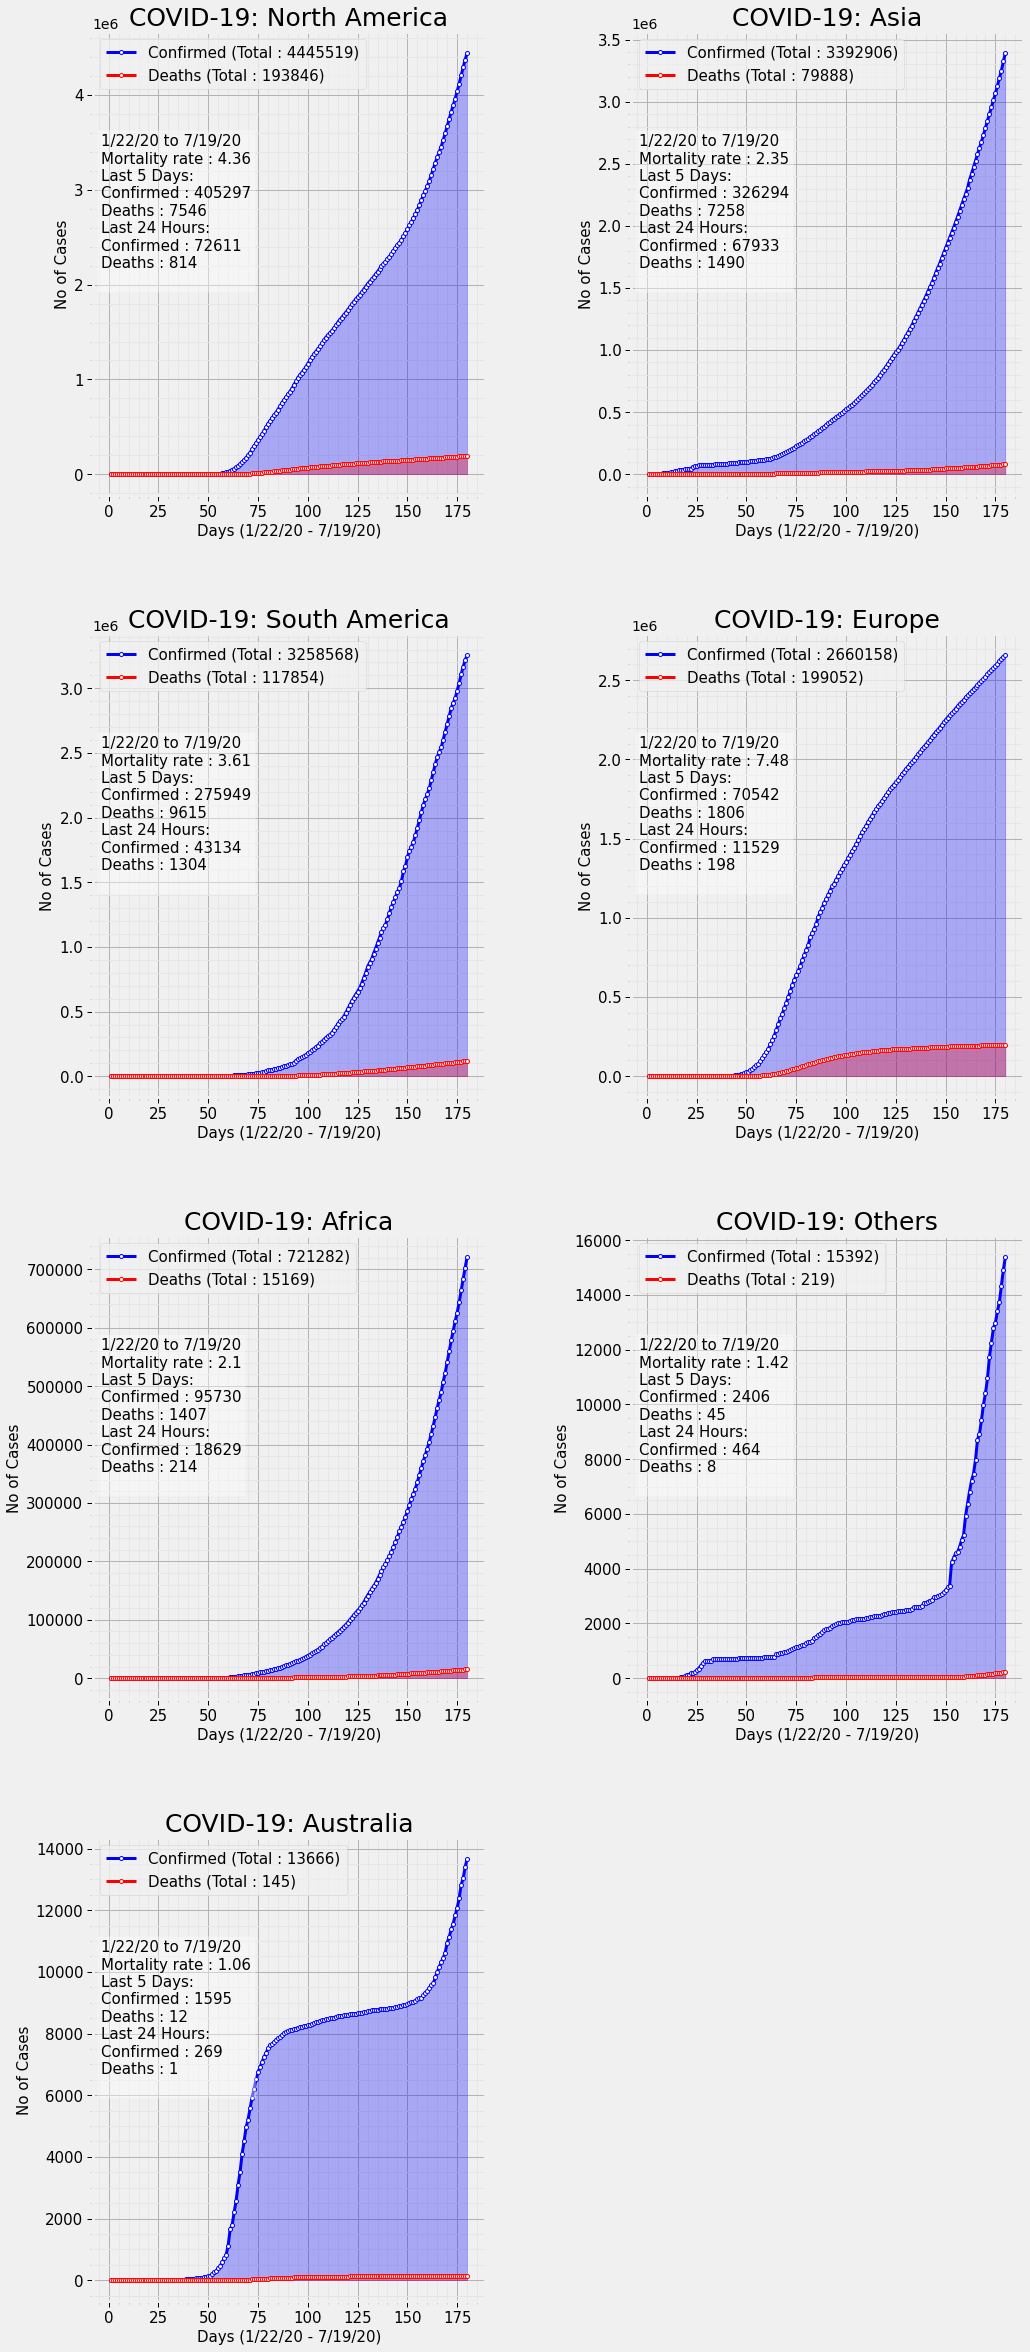

In [21]:
#Insert your code here:



**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

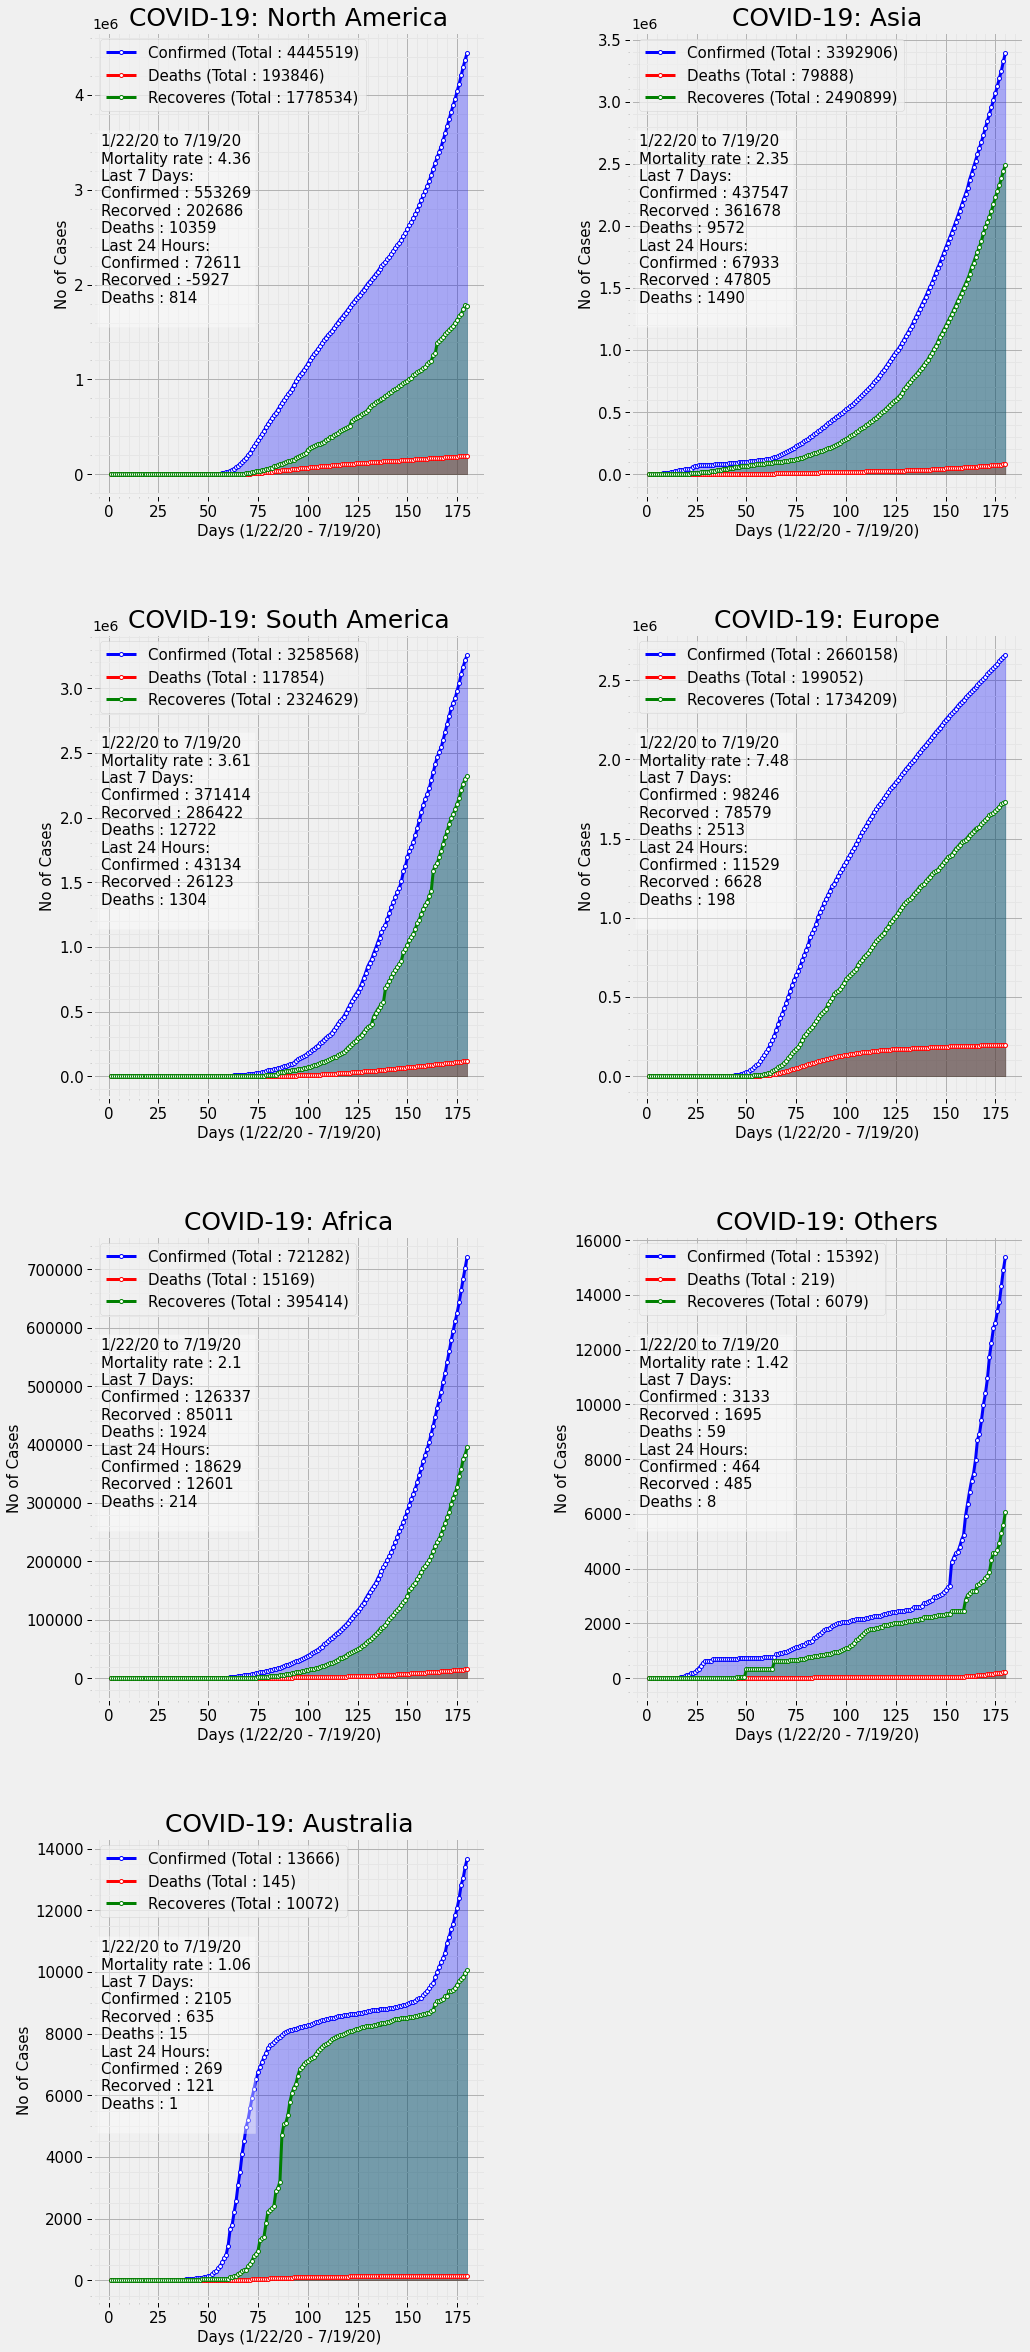

In [22]:
#Insert your code here:


# Problem 12
    Visualize the covariance matrix for continents_df.

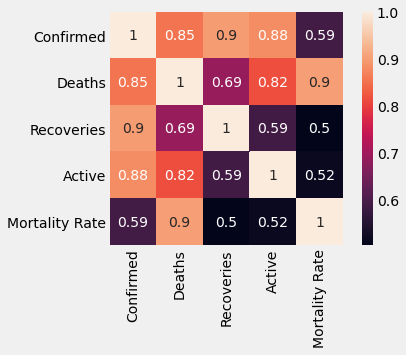

In [23]:
#Insert your code here:

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

/home/hana/hana/env37/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



<Figure size 1080x2880 with 0 Axes>

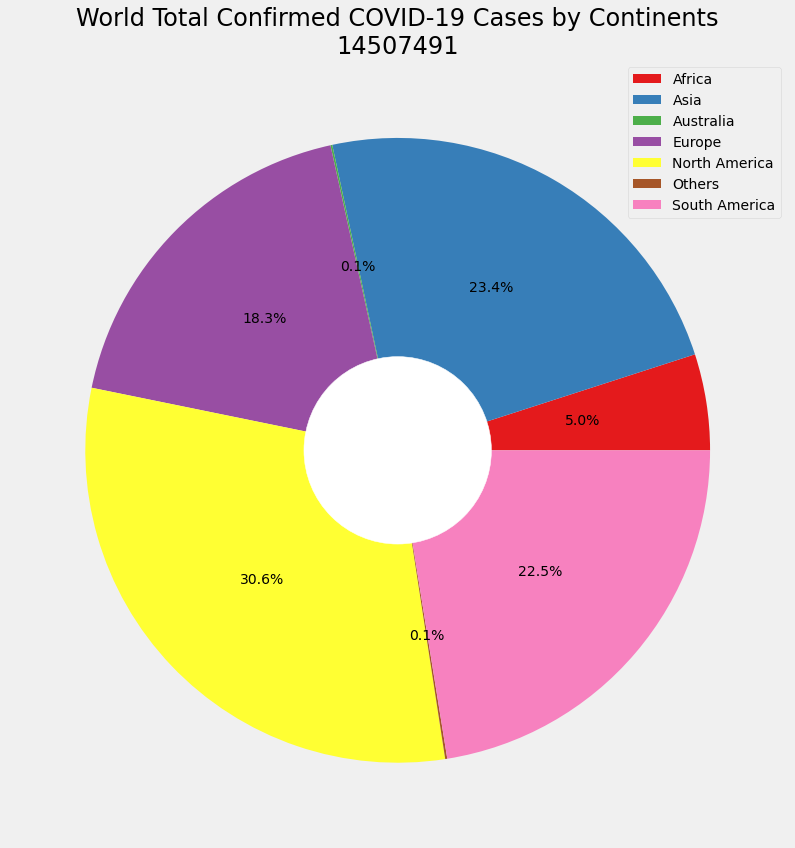

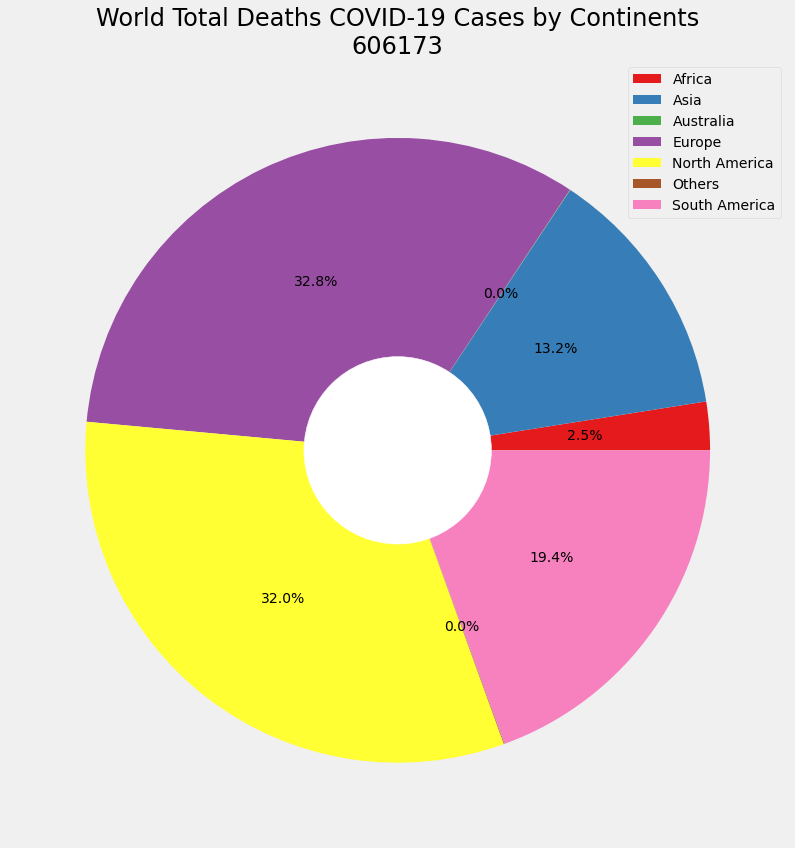

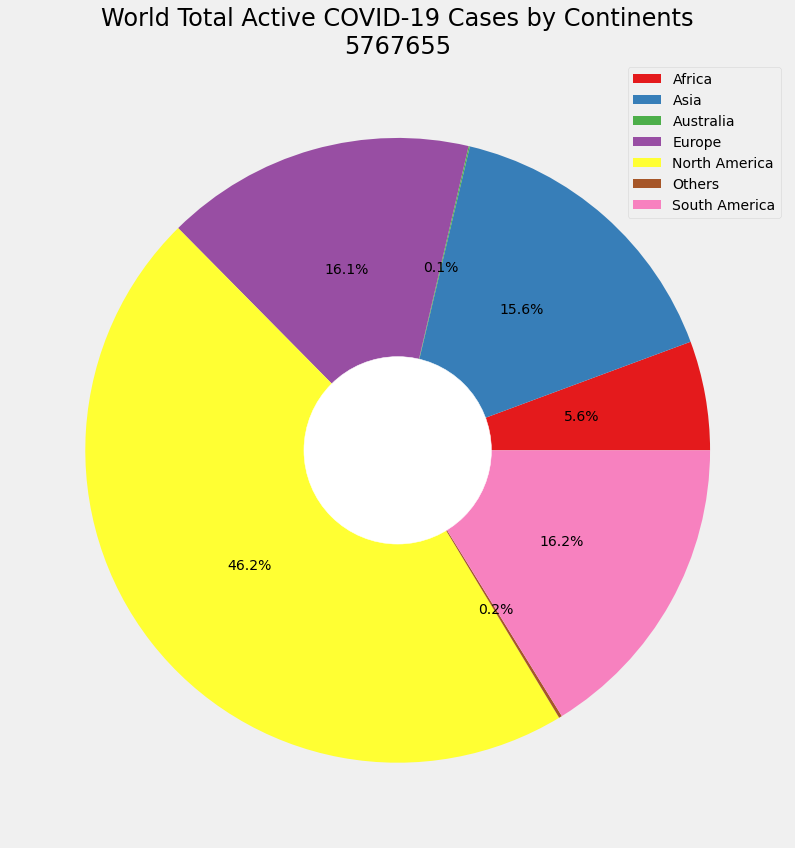

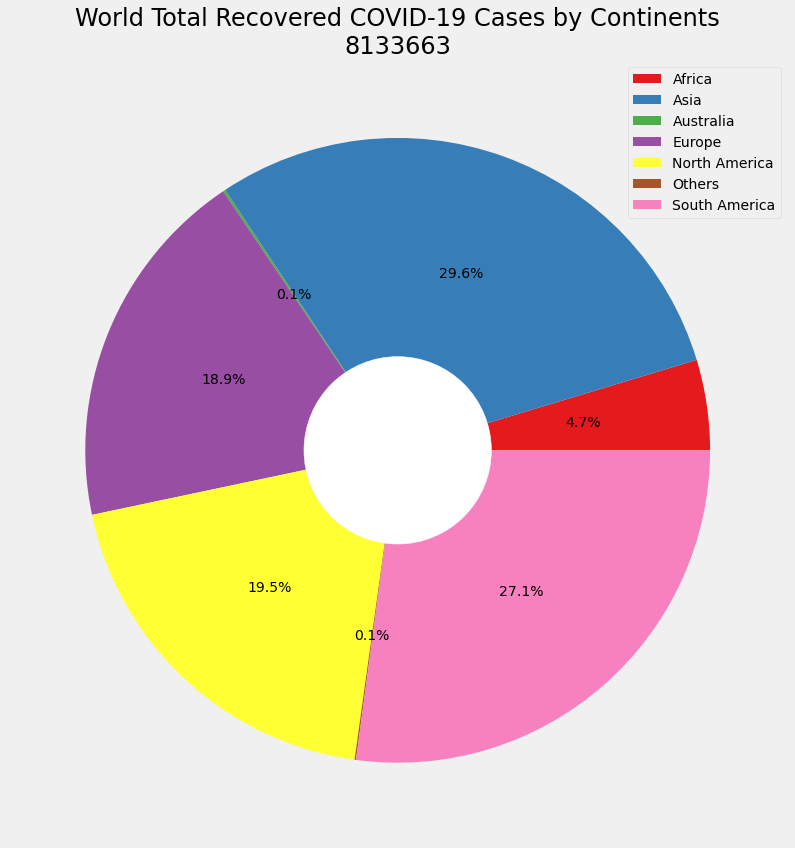

In [24]:
#Insert your code here:


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [25]:
#Insert your code here:




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [26]:
#Insert your code here:



/home/hana/hana/env37/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning:

divide by zero encountered in log10



# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [27]:
#Insert your code here:

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America    3773260  140534   
Brazil         -14.235000  -51.925300  South America    2098389   79488   
India           20.593684   78.962880           Asia    1118206   27497   
Russia          61.524010  105.318756         Europe     770311   12323   
South Africa   -30.559500   22.937500         Africa     364328    5033   
Peru            -9.190000  -75.015200  South America     353590   13187   
Mexico          23.634500 -102.552800  North America     344224   39184   
Chile          -35.675100  -71.543000  South America     330930    8503   
United Kingdom  24.548173  -43.902242         Europe     296358   45385   
Iran            32.427908   53.688046           Asia     273788   14188   

                Recoveries   Active  Mortality Rate  
Country/Region                                       
USA                1131121  2501605            3.72  
Brazil             1459072   559829            3.79  
India               700087   390622            2.46  
Russia              549387   208601            1.60  
South Africa        191059   168236            1.38  
Peru                241955    98448            3.73  
Mexico              254941    50099           11.38  
Chile               301794    20633            2.57  
United Kingdom        1413   249560           15.31  
Iran                237788    21812            5.18

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [28]:
#Insert your code here:


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

# Problem 21
**USA dataset**

In [29]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [30]:
#Insert your code here:

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [31]:
#Insert your code here: